<a href="https://colab.research.google.com/github/blleshi/Module-14-Challenge/blob/main/machine_learning_trading_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Trading Bot

In this Challenge, you’ll assume the role of a financial advisor at one of the top five financial advisory firms in the world. Your firm constantly competes with the other major firms to manage and automatically trade assets in a highly dynamic environment. In recent years, your firm has heavily profited by using computer algorithms that can buy and sell faster than human traders.

The speed of these transactions gave your firm a competitive advantage early on. But, people still need to specifically program these systems, which limits their ability to adapt to new data. You’re thus planning to improve the existing algorithmic trading systems and maintain the firm’s competitive advantage in the market. To do so, you’ll enhance the existing trading signals with machine learning algorithms that can adapt to new data.

## Instructions:

Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

* Establish a Baseline Performance

* Tune the Baseline Trading Algorithm

* Evaluate a New Machine Learning Classifier

* Create an Evaluation Report

#### Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four.

1. Import the OHLCV dataset into a Pandas DataFrame.

2. Generate trading signals using short- and long-window SMA values.

3. Split the data into training and testing datasets.

4. Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

5. Review the classification report associated with the `SVC` model predictions.

6. Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

7. Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

8. Write your conclusions about the performance of the baseline trading algorithm in the `README.md` file that’s associated with your GitHub repository. Support your findings by using the PNG image that you saved in the previous step.

#### Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. (You’ll choose the best by comparing the cumulative products of the strategy returns.) To do so, complete the following steps:

1. Tune the training algorithm by adjusting the size of the training dataset. To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing the training window?

> **Hint** To adjust the size of the training dataset, you can use a different `DateOffset` value&mdash;for example, six months. Be aware that changing the size of the training dataset also affects the size of the testing dataset.

2. Tune the trading algorithm by adjusting the SMA input features. Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

3. Choose the set of parameters that best improved the trading algorithm returns. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

#### Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. To do so, complete the following steps:

1. Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

2. Using the original training data as the baseline model, fit another model with the new classifier.

3. Backtest the new model to evaluate its performance. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. Answer the following questions: Did this new model perform better or worse than the provided baseline model? Did this new model perform better or worse than your tuned trading algorithm?

#### Create an Evaluation Report

In the previous sections, you updated your `README.md` file with your conclusions. To accomplish this section, you need to add a summary evaluation report at the end of the `README.md` file. For this report, express your final conclusions and analysis. Support your findings by using the PNG images that you created.


In [21]:
# Imports
import io
import pandas as pd
import numpy as np
from pathlib import Path
!pip install hvplot
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four.


### Step 1: Import the OHLCV dataset into a Pandas DataFrame.

In [22]:
# Import the OHLCV dataset into a Pandas Dataframe
from google.colab import files
uploaded = files.upload()

# Get the actual key of the uploaded file
uploaded_file_key = list(uploaded.keys())[0]

ohlcv_df = pd.read_csv(io.BytesIO(uploaded[uploaded_file_key]))

# Review the DataFrame
ohlcv_df.head()

Saving emerging_markets_ohlcv.csv to emerging_markets_ohlcv (1).csv


,date,open,high,low,close,volume
0,1/21/15 9:30,23.83,23.83,23.83,23.83,100
1,1/21/15 11:00,23.98,23.98,23.98,23.98,100
2,1/22/15 15:00,24.42,24.42,24.42,24.42,100
3,1/22/15 15:15,24.42,24.44,24.42,24.44,200
4,1/22/15 15:30,24.46,24.46,24.46,24.46,200


In [23]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["date", "close"]]  # Include "date" here

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())

,date,close,Actual Returns
1,1/21/15 11:00,23.98,0.006295
2,1/22/15 15:00,24.42,0.018349
3,1/22/15 15:15,24.44,0.000819
4,1/22/15 15:30,24.46,0.000818
5,1/26/15 12:30,24.33,-0.005315


## Step 2: Generate trading signals using short- and long-window SMA values.

In [24]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,date,close,Actual Returns,SMA_Fast,SMA_Slow
100,4/2/15 14:45,24.92,0.000000,24.9175,24.3214
101,4/2/15 15:00,24.92,0.000000,24.9200,24.3308
102,4/2/15 15:15,24.94,0.000803,24.9250,24.3360
103,4/2/15 15:30,24.95,0.000401,24.9325,24.3411
104,4/2/15 15:45,24.98,0.001202,24.9475,24.3463


,date,close,Actual Returns,SMA_Fast,SMA_Slow
4318,1/22/21 9:30,33.27,-0.006866,33.2025,30.40215
4319,1/22/21 11:30,33.35,0.002405,33.2725,30.44445
4320,1/22/21 13:45,33.42,0.002099,33.3850,30.48745
4321,1/22/21 14:30,33.47,0.001496,33.3775,30.53085
4322,1/22/21 15:45,33.44,-0.000896,33.4200,30.57495


In [25]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,date,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
100,4/2/15 14:45,24.92,0.000000,24.9175,24.3214,1.0
101,4/2/15 15:00,24.92,0.000000,24.9200,24.3308,1.0
102,4/2/15 15:15,24.94,0.000803,24.9250,24.3360,1.0
103,4/2/15 15:30,24.95,0.000401,24.9325,24.3411,1.0
104,4/2/15 15:45,24.98,0.001202,24.9475,24.3463,1.0


,date,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
4318,1/22/21 9:30,33.27,-0.006866,33.2025,30.40215,-1.0
4319,1/22/21 11:30,33.35,0.002405,33.2725,30.44445,1.0
4320,1/22/21 13:45,33.42,0.002099,33.3850,30.48745,1.0
4321,1/22/21 14:30,33.47,0.001496,33.3775,30.53085,1.0
4322,1/22/21 15:45,33.44,-0.000896,33.4200,30.57495,-1.0


In [26]:
signals_df['Signal'].value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [27]:
# Converting "date"
signals_df['date'] = pd.to_datetime(signals_df['date'])
signals_df = signals_df.set_index('date')

# Strategy returns
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Creating X and time-based slicing
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
training_begin = '2015-01-21 9:30'
training_end = '2021-03-22 15:45'
X_train = X.loc[training_begin:training_end]

# Review X_train DataFrame
X_train.head()

<ipython-input-27-2ecb93510742>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  signals_df['date'] = pd.to_datetime(signals_df['date'])


,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


<Axes: xlabel='date'>

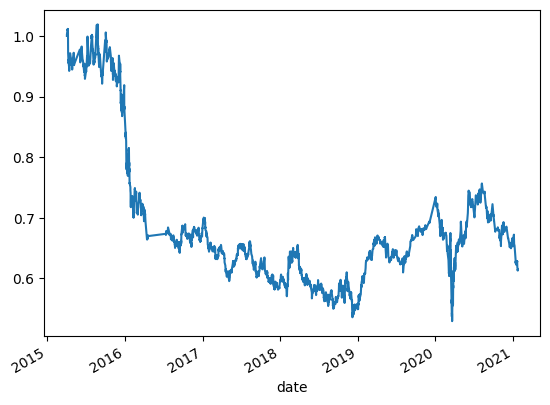

In [28]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

### Step 3: Split the data into training and testing datasets.

In [29]:
# Assuming 'signals_df' has a datetime index
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Set the index of X to a DatetimeIndex (if it's not already)
if not isinstance(X.index, pd.DatetimeIndex):
    X = X.set_index(pd.DatetimeIndex(signals_df.index))

# Now you can perform time-based slicing
training_begin = '2015-01-21 9:30'
training_end = '2021-03-22 15:45'
X_train = X.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [30]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [31]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-04-02 15:00:00


In [32]:
import pandas as pd

# Select the ending period for the training data with an offset of 3 months
training_end = pd.to_datetime(X.index.min()) + pd.DateOffset(months=3)

# Display the training end date
print(training_end)

2015-07-02 15:00:00


In [33]:
# Generate the X_train and y_train DataFrames
training_begin = '2015-01-21 9:30'
training_end = '2021-03-22 15:45'

X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [34]:
# Ensure training_end is a datetime object
training_begin = pd.to_datetime(training_begin)
training_end = X.index.max() - pd.DateOffset(days=7)  # Subtract one week, adjust as needed

# Ensure the index of X is a DatetimeIndex
X = X.set_index(pd.DatetimeIndex(X.index))

# Check if y is already a DataFrame
print(type(y))

# Convert the Series y to a DataFrame (only if y is not already a DataFrame)
if not isinstance(y, pd.DataFrame):
    y = y.to_frame()

# Now you can set the index of y
y = y.set_index(pd.DatetimeIndex(y.index))

# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end + pd.DateOffset(hours=1):]
y_test = y.loc[training_end + pd.DateOffset(hours=1):]

# Review the X_test and y_test DataFrames
print("X_test:")
print(X_test.head())
print(X_test.shape)
print("\ny_test:")
print(y_test.head())
print(y_test.shape)

<class 'pandas.core.series.Series'>
X_test:
                     SMA_Fast  SMA_Slow
date                                   
2021-01-19 09:30:00   32.7075  30.19855
2021-01-19 11:15:00   32.8500  30.23915
2021-01-19 12:30:00   32.9300  30.27845
2021-01-20 09:45:00   33.0100  30.31665
2021-01-22 09:30:00   33.1725  30.36035
(9, 2)

y_test:
                     Signal
date                       
2021-01-19 09:30:00     1.0
2021-01-19 11:15:00    -1.0
2021-01-19 12:30:00    -1.0
2021-01-20 09:45:00     1.0
2021-01-22 09:30:00    -1.0
(9, 1)


In [45]:
# Ensuring that training_end is a datetime object:
training_begin = pd.to_datetime(training_begin)
training_end = pd.to_datetime(training_end)

# Ensuring index of X is a DatetimeIndex:
X = X.set_index(pd.DatetimeIndex(X.index))

# NOW setting the index of y:
y = y.set_index(pd.DatetimeIndex(y.index))

# Adjusting the training end date to include data points:
training_end = X.index.max() - pd.DateOffset(hours=1)  # End one hour before the last data point
training_end = y.index.max() - pd.DateOffset(hours=1)  # End one hour before the last data point in 'y'

# Resampling to hourly frequency, filling missing values with forward fill
X_train = X.loc[training_begin:training_end].resample('H').fillna(method='ffill')
y_train = y.loc[training_begin:training_end].resample('H').fillna(method='ffill')

# Generating the X_test and y_test DataFrames
X_test = X.loc[training_end + pd.DateOffset(hours=1):].resample('H').last().ffill()
y_test = y.loc[training_end + pd.DateOffset(hours=1):].resample('H').last().ffill()

# Explicitly including the training_begin timestamp in both DataFrames
# Using a scalar fill value (e.g., 0) per error received:
X_train = X_train.reindex(pd.date_range(start=training_begin, end=training_end, freq='H'), fill_value=0)
y_train = y_train.reindex(pd.date_range(start=training_begin, end=training_end, freq='H'), fill_value=0)

# Review the shapes of the DataFrames
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Continue with scaling if the DataFrames are not empty:
if not X_train.empty:
    # Scale the features DataFrames
    # Create a StandardScaler instance
    scaler = StandardScaler()

    # Apply the scaler model to fit the X-train data
    X_scaler = scaler.fit(X_train)

    # Transform the X_train and X_test DataFrames using the X_scaler
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)


X_train shape: (52638, 2)
y_train shape: (52638, 1)
X_test shape: (1, 2)
y_test shape: (1, 1)


<ipython-input-45-30ef08ebde51>:16: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  X_train = X.loc[training_begin:training_end].resample('H').fillna(method='ffill')
<ipython-input-45-30ef08ebde51>:17: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  y_train = y.loc[training_begin:training_end].resample('H').fillna(method='ffill')


### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [46]:
# Check the unique classes in y_train
unique_classes = y_train.iloc[:, 0].unique()  # Assuming your target is in the first column
print("Unique classes in y_train:", unique_classes)

if len(unique_classes) < 2:
    print("Error: y_train contains only one class. SVM requires at least two classes for training.")
    # Investigate the cause of single class in y_train (data imbalance, splitting issues, etc.)
    # ... (Add code to address the issue based on the cause)
else:
    # From SVM, instantiate SVC classifier model instance
    svm_model = svm.SVC()

    # Fit the model to the data using the training data
    svm_model = svm_model.fit(X_train_scaled, y_train.values.ravel())

    # Use the testing data to make the model predictions
    svm_pred = svm_model.predict(X_test_scaled)

    # Review the model's predicted values
    print(svm_pred[:10])

Unique classes in y_train: [0.]
Error: y_train contains only one class. SVM requires at least two classes for training.


### Step 5: Review the classification report associated with the `SVC` model predictions.

In [37]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = # YOUR CODE HERE

# Print the classification report
# YOUR CODE HERE


SyntaxError: invalid syntax (<ipython-input-37-d4c3ce452bba>, line 2)

### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [ ]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = # YOUR CODE HERE

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = # YOUR CODE HERE

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = # YOUR CODE HERE

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = # YOUR CODE HERE

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

In [ ]:
# Plot the actual returns versus the strategy returns
# YOUR CODE HERE


---

## Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset.

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file.

Answer the following question: What impact resulted from increasing or decreasing the training window?

### Step 2: Tune the trading algorithm by adjusting the SMA input features.

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file.

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

### Step 3: Choose the set of parameters that best improved the trading algorithm returns.

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model.

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [ ]:
# Import a new classifier from SKLearn
# YOUR CODE HERE

# Initiate the model instance
# YOUR CODE HERE


### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [ ]:
# Fit the model using the training data
model = # YOUR CODE HERE

# Use the testing dataset to generate the predictions for the new model
pred = # YOUR CODE HERE

# Review the model's predicted values
# YOUR CODE HERE


### Step 3: Backtest the new model to evaluate its performance.

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file.

Answer the following questions:
Did this new model perform better or worse than the provided baseline model?
Did this new model perform better or worse than your tuned trading algorithm?

In [ ]:
# Use a classification report to evaluate the model using the predictions and testing data
# YOUR CODE HERE

# Print the classification report
# YOUR CODE HERE


In [ ]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
# YOUR CODE HERE

# Add the SVM model predictions to the DataFrame
# YOUR CODE HERE

# Add the actual returns to the DataFrame
# YOUR CODE HERE

# Add the strategy returns to the DataFrame
# YOUR CODE HERE

# Review the DataFrame
# YOUR CODE HERE


In [ ]:
# Plot the actual returns versus the strategy returns
# YOUR CODE HERE